In [1]:
# Seed for random events
from numpy.random import seed
seed(1)

In [2]:
# Dependencies
import numpy as np
import pandas as pd

In [3]:
import tensorflow

C:\Users\luisg\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\luisg\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\luisg\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\luisg\anaconda3\envs\PythonData\lib\site-packages

In [4]:
bean_df = pd.read_csv('Resources/Dry_Bean_Dataset.csv')
bean_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


## Data Pre-Processing

In [5]:
X = bean_df.drop("Class", axis = 1)
y = bean_df['Class']
print(X.shape, y.shape)

(13611, 16) (13611,)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [8]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [10]:
# One-hot-encode the encoded labels
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

## Create Neural Network Model - Adam Optimizer

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
# Create model and add layers
adam = Sequential()
adam.add(Dense(units = 14, activation = 'relu', input_dim = 16))
adam.add(Dense(units = 7, activation = 'softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
# Compile and fit the model
adam.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [14]:
adam.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 14)                238       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 105       
Total params: 343
Trainable params: 343
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = adam.fit(
    X_train_scaled,
    y_train_categorical,
    epochs = 50,
    shuffle = True,
    verbose = 2
)

Epoch 1/50
10208/10208 - 0s - loss: 1.6630 - acc: 0.3752
Epoch 2/50
10208/10208 - 0s - loss: 1.1965 - acc: 0.5693
Epoch 3/50
10208/10208 - 0s - loss: 0.8710 - acc: 0.7455
Epoch 4/50
10208/10208 - 0s - loss: 0.6470 - acc: 0.8468
Epoch 5/50
10208/10208 - 0s - loss: 0.5190 - acc: 0.8673
Epoch 6/50
10208/10208 - 0s - loss: 0.4429 - acc: 0.8790
Epoch 7/50
10208/10208 - 0s - loss: 0.3947 - acc: 0.8841
Epoch 8/50
10208/10208 - 0s - loss: 0.3637 - acc: 0.8878
Epoch 9/50
10208/10208 - 0s - loss: 0.3425 - acc: 0.8900
Epoch 10/50
10208/10208 - 0s - loss: 0.3275 - acc: 0.8901
Epoch 11/50
10208/10208 - 0s - loss: 0.3160 - acc: 0.8922
Epoch 12/50
10208/10208 - 0s - loss: 0.3059 - acc: 0.8944
Epoch 13/50
10208/10208 - 0s - loss: 0.2997 - acc: 0.8954
Epoch 14/50
10208/10208 - 0s - loss: 0.2937 - acc: 0.8945
Epoch 15/50
10208/10208 - 0s - loss: 0.2881 - acc: 0.8976
Epoch 16/50
10208/10208 - 0s - loss: 0.2828 - acc: 0.8995
Epoch 17/50
10208/10208 - 0s - loss: 0.2788 - acc: 0.9008
Epoch 18/50
10208/10208

In [16]:
adam_losses = history.history['loss']
adam_accs = history.history['acc']

In [17]:
# Quantify Adam Model 
adam_loss, adam_acc = adam.evaluate(
    X_test_scaled, y_test_categorical, verbose = 2)
print(
    f"Neural Network with Adam Optimizer - Loss: {adam_loss}, Accuracy: {adam_acc}")

3403/3403 - 0s - loss: 0.2339 - acc: 0.9195
Neural Network with Adam Optimizer - Loss: 0.23392282210699852, Accuracy: 0.9194828271865845


## Nadam Optimizer

In [18]:
# Create model and add layers
nadam = Sequential()
nadam.add(Dense(units = 14, activation = 'relu', input_dim = 16))
nadam.add(Dense(units = 7, activation = 'softmax'))

In [19]:
# Compile and fit the model
nadam.compile(optimizer = 'nadam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [20]:
history = nadam.fit(
    X_train_scaled,
    y_train_categorical,
    epochs = 50,
    shuffle = True,
    verbose = 2
)

Epoch 1/50
10208/10208 - 0s - loss: 1.6525 - acc: 0.3610
Epoch 2/50
10208/10208 - 0s - loss: 1.0962 - acc: 0.6563
Epoch 3/50
10208/10208 - 0s - loss: 0.7745 - acc: 0.8020
Epoch 4/50
10208/10208 - 0s - loss: 0.6046 - acc: 0.8539
Epoch 5/50
10208/10208 - 0s - loss: 0.5047 - acc: 0.8703
Epoch 6/50
10208/10208 - 0s - loss: 0.4421 - acc: 0.8768
Epoch 7/50
10208/10208 - 0s - loss: 0.4013 - acc: 0.8802
Epoch 8/50
10208/10208 - 0s - loss: 0.3733 - acc: 0.8806
Epoch 9/50
10208/10208 - 0s - loss: 0.3532 - acc: 0.8835
Epoch 10/50
10208/10208 - 0s - loss: 0.3388 - acc: 0.8856
Epoch 11/50
10208/10208 - 0s - loss: 0.3273 - acc: 0.8869
Epoch 12/50
10208/10208 - 0s - loss: 0.3177 - acc: 0.8907
Epoch 13/50
10208/10208 - 0s - loss: 0.3109 - acc: 0.8905
Epoch 14/50
10208/10208 - 0s - loss: 0.3046 - acc: 0.8922
Epoch 15/50
10208/10208 - 0s - loss: 0.2990 - acc: 0.8934
Epoch 16/50
10208/10208 - 0s - loss: 0.2945 - acc: 0.8958
Epoch 17/50
10208/10208 - 0s - loss: 0.2904 - acc: 0.8954
Epoch 18/50
10208/10208

In [21]:
nadam_losses = history.history['loss']
nadam_accs = history.history['acc']

In [22]:
# Quantify Nadam Model 
nadam_loss, nadam_acc = nadam.evaluate(
    X_test_scaled, y_test_categorical, verbose = 2)
print(
    f"Neural Network with Nadam Optimizer - Loss: {nadam_loss}, Accuracy: {nadam_acc}")

3403/3403 - 0s - loss: 0.2357 - acc: 0.9168
Neural Network with Nadam Optimizer - Loss: 0.23569245643469294, Accuracy: 0.9168381094932556


## RMSProp Optimizer

In [23]:
# Create model and add layers
rmsprop = Sequential()
rmsprop.add(Dense(units = 14, activation = 'relu', input_dim = 16))
rmsprop.add(Dense(units = 7, activation = 'softmax'))

In [24]:
# Compile and fit the model
rmsprop.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [25]:
history = rmsprop.fit(
    X_train_scaled,
    y_train_categorical,
    epochs = 50,
    shuffle = True,
    verbose = 2
)

Epoch 1/50
10208/10208 - 0s - loss: 1.7578 - acc: 0.2577
Epoch 2/50
10208/10208 - 0s - loss: 1.4386 - acc: 0.4352
Epoch 3/50
10208/10208 - 0s - loss: 1.1197 - acc: 0.5941
Epoch 4/50
10208/10208 - 0s - loss: 0.8540 - acc: 0.7528
Epoch 5/50
10208/10208 - 0s - loss: 0.6678 - acc: 0.8424
Epoch 6/50
10208/10208 - 0s - loss: 0.5485 - acc: 0.8720
Epoch 7/50
10208/10208 - 0s - loss: 0.4722 - acc: 0.8797
Epoch 8/50
10208/10208 - 0s - loss: 0.4236 - acc: 0.8852
Epoch 9/50
10208/10208 - 0s - loss: 0.3913 - acc: 0.8854
Epoch 10/50
10208/10208 - 0s - loss: 0.3692 - acc: 0.8859
Epoch 11/50
10208/10208 - 0s - loss: 0.3526 - acc: 0.8849
Epoch 12/50
10208/10208 - 0s - loss: 0.3407 - acc: 0.8867
Epoch 13/50
10208/10208 - 0s - loss: 0.3313 - acc: 0.8878
Epoch 14/50
10208/10208 - 0s - loss: 0.3230 - acc: 0.8908
Epoch 15/50
10208/10208 - 0s - loss: 0.3180 - acc: 0.8903
Epoch 16/50
10208/10208 - 0s - loss: 0.3121 - acc: 0.8889
Epoch 17/50
10208/10208 - 0s - loss: 0.3077 - acc: 0.8909
Epoch 18/50
10208/10208

In [26]:
rmsprop_losses = history.history['loss']
rmsprop_accs = history.history['acc']

In [27]:
# Quantify RMSProp Model 
rmsprop_loss, rmsprop_acc = rmsprop.evaluate(
    X_test_scaled, y_test_categorical, verbose = 2)
print(
    f"Neural Network with RMSProp Optimizer - Loss: {rmsprop_loss}, Accuracy: {rmsprop_acc}") 

3403/3403 - 0s - loss: 0.2572 - acc: 0.9092
Neural Network with RMSProp Optimizer - Loss: 0.2571657390834267, Accuracy: 0.9091977477073669


## SGD Optimizer

In [28]:
# Create model and add layers
sgd = Sequential()
sgd.add(Dense(units = 14, activation = 'relu', input_dim = 16))
sgd.add(Dense(units = 7, activation = 'softmax'))

In [29]:
# Compile and fit the model
sgd.compile(optimizer = 'sgd',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [30]:
history = sgd.fit(
    X_train_scaled,
    y_train_categorical,
    epochs = 50,
    shuffle = True,
    verbose = 2
)

Epoch 1/50
10208/10208 - 0s - loss: 1.8590 - acc: 0.1825
Epoch 2/50
10208/10208 - 0s - loss: 1.7583 - acc: 0.2618
Epoch 3/50
10208/10208 - 0s - loss: 1.6804 - acc: 0.2621
Epoch 4/50
10208/10208 - 0s - loss: 1.5980 - acc: 0.2667
Epoch 5/50
10208/10208 - 0s - loss: 1.5048 - acc: 0.3005
Epoch 6/50
10208/10208 - 0s - loss: 1.4006 - acc: 0.3971
Epoch 7/50
10208/10208 - 0s - loss: 1.2912 - acc: 0.4368
Epoch 8/50
10208/10208 - 0s - loss: 1.1876 - acc: 0.5031
Epoch 9/50
10208/10208 - 0s - loss: 1.0949 - acc: 0.5842
Epoch 10/50
10208/10208 - 0s - loss: 1.0146 - acc: 0.6388
Epoch 11/50
10208/10208 - 0s - loss: 0.9454 - acc: 0.6799
Epoch 12/50
10208/10208 - 0s - loss: 0.8864 - acc: 0.7149
Epoch 13/50
10208/10208 - 0s - loss: 0.8356 - acc: 0.7403
Epoch 14/50
10208/10208 - 0s - loss: 0.7920 - acc: 0.7613
Epoch 15/50
10208/10208 - 0s - loss: 0.7538 - acc: 0.7788
Epoch 16/50
10208/10208 - 0s - loss: 0.7201 - acc: 0.7904
Epoch 17/50
10208/10208 - 0s - loss: 0.6903 - acc: 0.8018
Epoch 18/50
10208/10208

In [31]:
sgd_losses = history.history['loss']
sgd_accs = history.history['acc']

In [32]:
# Quantify SGD Model 
sgd_loss, sgd_acc = sgd.evaluate(
    X_test_scaled, y_test_categorical, verbose = 2)
print(
    f"Neural Network with SGD Optimizer - Loss: {sgd_loss}, Accuracy: {sgd_acc}")

3403/3403 - 0s - loss: 0.3581 - acc: 0.8895
Neural Network with SGD Optimizer - Loss: 0.35812340130744313, Accuracy: 0.8895092606544495


## Tabulate model accuracies and losses and graph performance

In [34]:
# Tabulate
optimizer_names = ["Adam", "Nadam", "RMSProp", "SGD"]
optimizer_accs = [adam_acc, nadam_acc, rmsprop_acc, sgd_acc]
optimizer_losses = [adam_loss, nadam_loss, rmsprop_loss, sgd_loss]
performance_df = pd.DataFrame({"Optimizer": optimizer_names,
                               "Accuracy": optimizer_accs,
                               "Loss": optimizer_losses})
performance_df

,Optimizer,Accuracy,Loss
0,Adam,0.919483,0.233923
1,Nadam,0.916838,0.235692
2,RMSProp,0.909198,0.257166
3,SGD,0.889509,0.358123


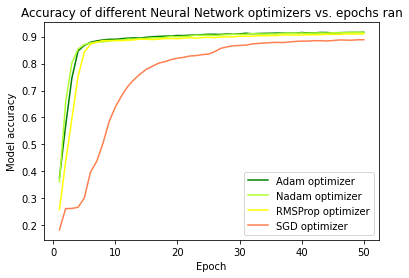

In [37]:
## Plot model accuracy and loss over epochs

import matplotlib.pyplot as plt

epochs = range(1,51)
plt.plot(epochs, adam_accs, 'green', label = "Adam optimizer")
plt.plot(epochs, nadam_accs, 'greenyellow', label = "Nadam optimizer")
plt.plot(epochs, rmsprop_accs, 'yellow', label = "RMSProp optimizer")
plt.plot(epochs, sgd_accs, 'coral', label = "SGD optimizer")
plt.xlabel("Epoch")
plt.ylabel("Model accuracy")
plt.title("Accuracy of different Neural Network optimizers vs. epochs ran")
plt.legend()
plt.savefig("optimizer_accuracy.png")
plt.show()

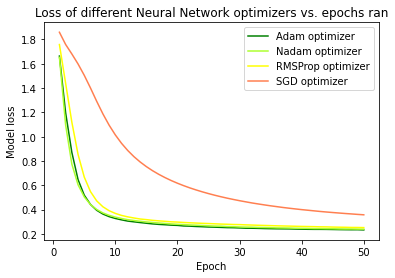

In [38]:
plt.plot(epochs, adam_losses, 'green', label = "Adam optimizer")
plt.plot(epochs, nadam_losses, 'greenyellow', label = "Nadam optimizer")
plt.plot(epochs, rmsprop_losses, 'yellow', label = "RMSProp optimizer")
plt.plot(epochs, sgd_losses, 'coral', label = "SGD optimizer")
plt.xlabel("Epoch")
plt.ylabel("Model loss")
plt.title("Loss of different Neural Network optimizers vs. epochs ran")
plt.legend()
plt.savefig("optimizer_loss.png")
plt.show()